# Анализ цен на недвижимость
[Набор данных](https://www.kaggle.com/mrdaniilak/russia-real-estate-20182021) содержит список цен на недвижимость в разных регионах России в период с 2018 по 2021 год. 

**Цель работы**: провести анализ данных и на основе информации о недвижимости научиться предсказывать цены.

Набор данных содержит следующие данные:
- price - цена в рублях
- date - дата создания объявления
- time - время создания
- geo_lat, geo_lon - координаты
- region - номер региона
- building_type - тип фасада (0 - другой. 1 - панельный. 2 - монолитный. 3 - кирпичный. 4 - блочный. 5 - деревянный)
- object_type - тип здания (1 - старое здание; 2 - новостройка)
- level - этаж
- levels - число этажей
- rooms - количество комнат (отрицательные для студий)
- area - площадь в метрах квадратных
- kitchen_area - площадь кухни


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! kaggle datasets download mrdaniilak/russia-real-estate-20182021
! unzip -o russia-real-estate-20182021.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
russia-real-estate-20182021.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  russia-real-estate-20182021.zip
replace all_v2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: all_v2.csv              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.float_format',  '{:,.2f}'.format)
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 14})

Загрузим и посмотрим данные

In [ ]:
df = pd.read_csv('all_v2.csv')
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,1
1,8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,1
2,4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,1
3,1850000,2018-03-01,11:24:52,45.00,39.07,2843,4,12,16,2,38.00,5.00,11
4,5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.80,37.75,3,1,8,17,4,93.20,13.80,11
5477002,12503160,2021-05-01,20:14:01,55.84,37.49,3,2,17,32,2,45.90,6.60,11
5477003,8800000,2021-05-01,20:14:04,56.28,44.08,2871,2,4,17,3,86.50,11.80,1
5477004,11831910,2021-05-01,20:14:12,55.80,37.75,3,1,8,33,2,52.10,18.90,11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


Посмотрим общую информацию о данных

In [ ]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,"5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00","5,477,006.00"
mean,"4,422,029.02",54.04,53.24,"4,307.14",1.95,6.21,11.40,1.73,53.92,10.63,3.95
std,"21,507,519.15",4.62,20.75,"3,308.05",1.04,4.96,6.54,1.08,33.35,9.79,4.56
min,"-2,144,967,296.00",41.46,19.89,3.00,0.00,1.00,1.00,-2.00,0.07,0.01,1.00
25%,"1,950,000.00",53.38,37.78,"2,661.00",1.00,2.00,5.00,1.00,38.00,7.00,1.00
50%,"2,990,000.00",55.17,43.07,"2,922.00",2.00,5.00,10.00,2.00,48.02,9.70,1.00
75%,"4,802,000.00",56.23,65.65,"6,171.00",3.00,9.00,16.00,2.00,63.13,12.70,11.00
max,"2,147,483,647.00",71.98,162.54,"61,888.00",5.00,39.00,39.00,10.00,"7,856.00","9,999.00",11.00


Видим, что в цене есть сильные выбросы, видимо, из-за неправильного внесения данных. Так же в area и kitchen_area.

Пропусков в данных нет.





Допустим, что отрицательные значения - ошибочно записанные положительные.

А сами цены оставим в адекватном пределе от 100000 до 30000000 рублей.

In [ ]:
df['price'] = df['price'].abs()

df = df[(df['price'] >= 100000) & (df['price'] <= 30000000)]

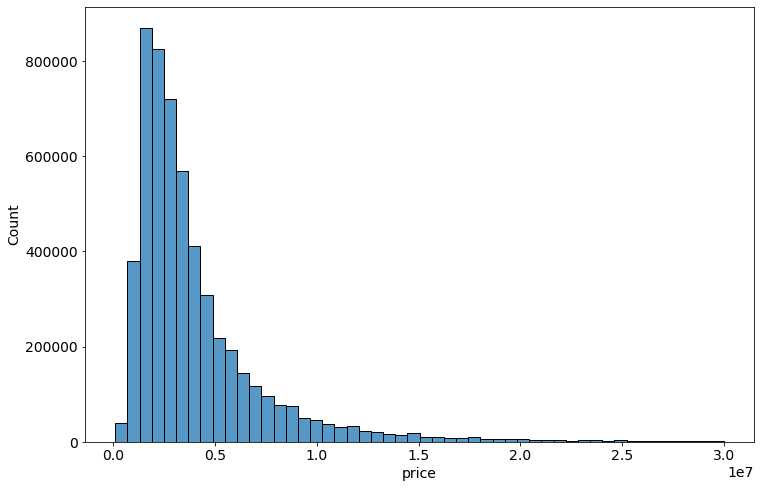

In [ ]:
sns.histplot(data=df, x='price', bins=50)

In [ ]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,"5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00","5,437,813.00"
mean,"4,043,591.52",54.02,53.34,"4,326.90",1.95,6.20,11.39,1.72,53.29,10.54,3.94
std,"3,488,589.06",4.63,20.76,"3,305.13",1.04,4.95,6.52,1.07,31.42,9.22,4.56
min,"100,000.00",41.46,19.89,3.00,0.00,1.00,1.00,-2.00,0.07,0.01,1.00
25%,"1,950,000.00",53.37,37.80,"2,661.00",1.00,2.00,5.00,1.00,38.00,7.00,1.00
50%,"2,972,260.00",55.16,43.57,"2,922.00",2.00,5.00,10.00,2.00,48.00,9.60,1.00
75%,"4,780,000.00",56.23,65.72,"6,171.00",3.00,9.00,16.00,2.00,63.00,12.50,11.00
max,"30,000,000.00",71.98,162.54,"61,888.00",5.00,39.00,39.00,9.00,"7,856.00","9,999.00",11.00


Площадь стоит ограничить значения от 3 метров квадратных до 150 (для кухни до 40).

In [ ]:
df = df[(df['area'] >= 3) & (df['area'] <= 150)]
df = df[(df['kitchen_area'] >= 0) & (df['kitchen_area'] <= 40)]

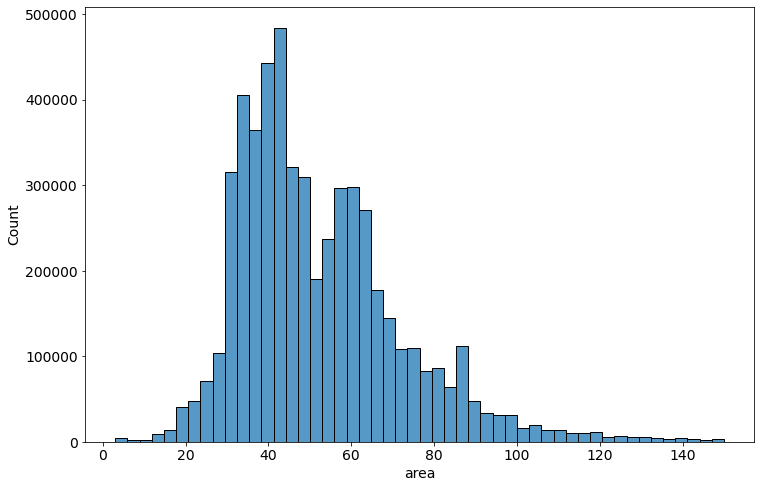

In [ ]:
# общая площадь
sns.histplot(data=df, x='area', bins=50)

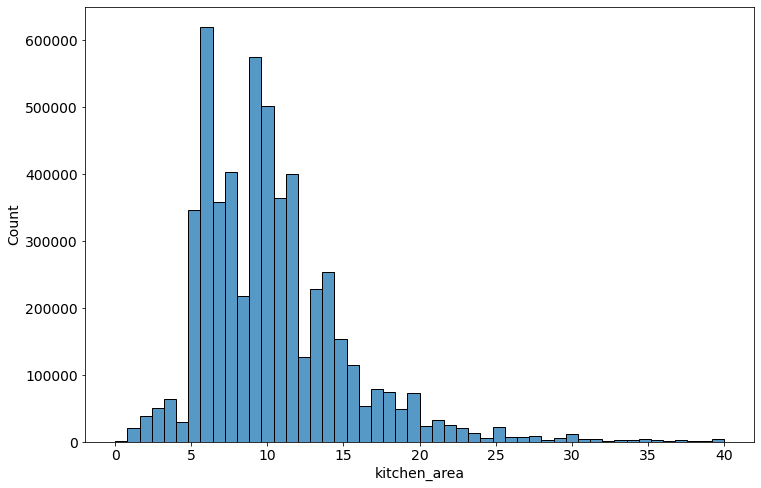

In [ ]:
# площадь кухни
sns.histplot(data=df, x='kitchen_area', bins=50)

Посмотрим на количество различных типов фасада и зданий.

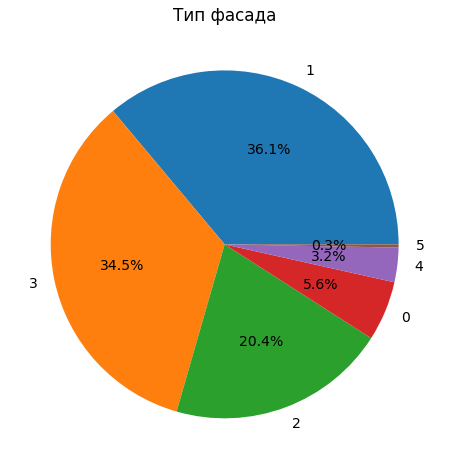

In [ ]:
building_types = df['building_type'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Тип фасада')
plt.show()

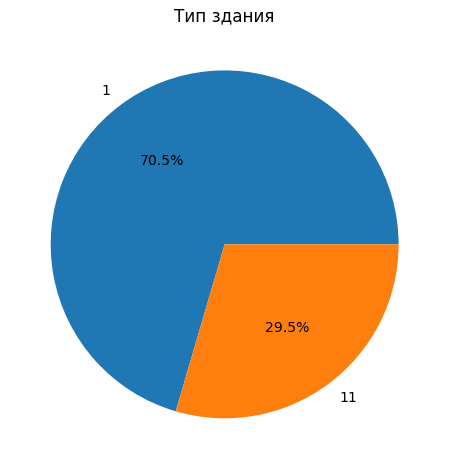

In [ ]:
object_types = df['object_type'].value_counts()
plt.pie(object_types.values, labels=object_types.index, autopct='%1.1f%%')
plt.title('Тип здания')
plt.show()

Среди признаков категориальными можно выделить тип фасада, здания, регион, количество комнат.

Числовыми использовать площадь (общую и кухни), этаж и число этажей в здании.

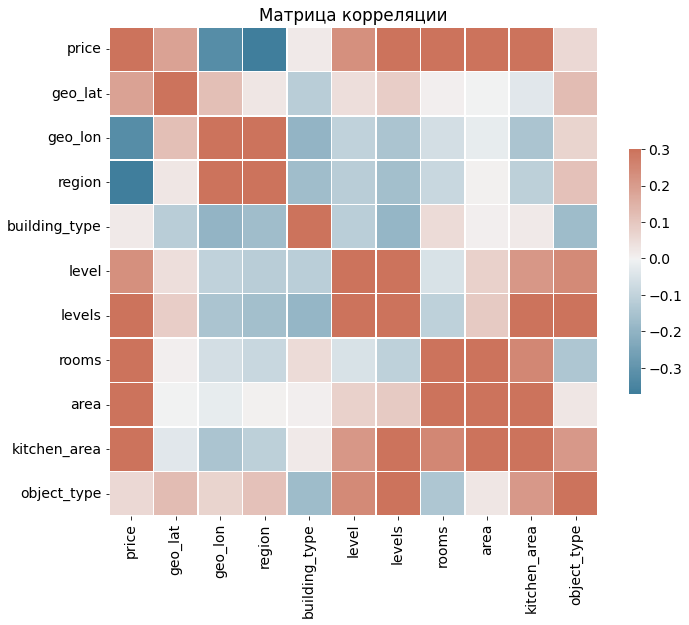

In [ ]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Матрица корреляции')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Линейная регрессия

In [ ]:
# Создание датасета для обучения
df_train = df[['area', 'kitchen_area', 'level', 'levels', 'building_type', 'object_type', 'region', 'rooms']]
# Кодирование категориальных признаков
df_train = pd.get_dummies(df_train, columns=['building_type', 'object_type', 'region', 'rooms'])

In [ ]:
df_train

,area,kitchen_area,level,levels,building_type_0,building_type_1,building_type_2,building_type_3,building_type_4,building_type_5,...,rooms_-1,rooms_1,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,rooms_8,rooms_9
0,82.60,10.80,8,10,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,69.10,12.00,5,24,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,66.00,10.00,5,9,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,38.00,5.00,12,16,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,60.00,10.00,13,14,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,93.20,13.80,8,17,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5477002,45.90,6.60,17,32,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5477003,86.50,11.80,4,17,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5477004,52.10,18.90,8,33,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn import linear_model 

reg = linear_model.LinearRegression()
reg.fit(df_train, df['price'])

LinearRegression()

In [ ]:
predicted = pd.Series(reg.predict(df_train))

In [ ]:
pd.concat([predicted, df.reset_index(drop=True)], axis=1)

,0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,"8,535,186.95",6050000,2018-02-19,20:00:21,59.81,30.38,2661,1,8,10,3,82.60,10.80,1
1,"6,838,097.56",8650000,2018-02-27,12:04:54,55.68,37.30,81,3,5,24,2,69.10,12.00,1
2,"4,012,712.54",4000000,2018-02-28,15:44:00,56.30,44.06,2871,1,5,9,3,66.00,10.00,1
3,"1,190,267.33",1850000,2018-03-01,11:24:52,45.00,39.07,2843,4,12,16,2,38.00,5.00,11
4,"5,775,857.49",5450000,2018-03-01,17:42:43,55.92,37.98,81,3,13,14,2,60.00,10.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5400397,"12,336,133.76",19739760,2021-05-01,20:13:58,55.80,37.75,3,1,8,17,4,93.20,13.80,11
5400398,"10,235,611.82",12503160,2021-05-01,20:14:01,55.84,37.49,3,2,17,32,2,45.90,6.60,11
5400399,"6,996,471.99",8800000,2021-05-01,20:14:04,56.28,44.08,2871,2,4,17,3,86.50,11.80,1
5400400,"10,169,176.52",11831910,2021-05-01,20:14:12,55.80,37.75,3,1,8,33,2,52.10,18.90,11


In [ ]:
from sklearn.metrics import mean_squared_error

print("RMSE =", mean_squared_error(df['price'], predicted, squared=False))

RMSE = 1859500.7864869025


В целом обычная линейная регрессия неплохо справляется с предсказанием стоимости жилья по указанным признакам. Среднеквадратичное отклонение получилось равным 1.8 миллиона рублей, что не так плохо, учитывая общий разброс цен.

В идеале каждый отдельный регион (а лучше город) требует построения отдельной модели, потому что разные признаки могут оказывать разное влияние в зависимости от местности, климата, менталитета.
